# Análisis del riesgo de incumplimiento de los prestatarios

Tu proyecto consiste en preparar un informe para la división de préstamos de un banco. Deberás averiguar si el estado civil y el número de hijos de un cliente tienen un impacto en el incumplimiento de pago de un préstamo. El banco ya tiene algunos datos sobre la solvencia crediticia de los clientes.

Tu informe se tendrá en cuenta al crear una **puntuación de crédito** para un cliente potencial. La **puntuación de crédito** se utiliza para evaluar la capacidad de un prestatario potencial para pagar su préstamo.

## Tabla de contenidos 
- Información general
- Procesamiento de datos
- Análisis exploratorio
- Conclusión general


## Información general


In [972]:
# Librerias a importar
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt

In [973]:
df = pd.read_csv('/content/credit_scoring_eng.csv')

In [974]:
# Vamos a ver cuántas filas y columnas tiene nuestro conjunto de datos
df.shape
nRow, nCol = df.shape
print(f'Hay {nRow} filas y {nCol} columnas')

Hay 21525 filas y 12 columnas


In [975]:
# vamos a mostrar las primeras filas N
df.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding
5,0,-926.185831,27,bachelor's degree,0,civil partnership,1,M,business,0,40922.170,purchase of the house
6,0,-2879.202052,43,bachelor's degree,0,married,0,F,business,0,38484.156,housing transactions
7,0,-152.779569,50,SECONDARY EDUCATION,1,married,0,M,employee,0,21731.829,education
8,2,-6929.865299,35,BACHELOR'S DEGREE,0,civil partnership,1,F,employee,0,15337.093,having a wedding
9,0,-2188.756445,41,secondary education,1,married,0,M,employee,0,23108.150,purchase of the house for my family



A primera vista  la columna `days_employed` muestra valores negativos y la columna `education` presenta duplicados.

In [976]:
# Obtener información sobre los datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


Solo las columnas `days_employed` como `total_income` presentan datos nulos.

In [977]:
# Veamos la tabla filtrada con valores ausentes de la primera columna donde faltan datos
df[df['days_employed'].isnull()]
#-------------------------
df.isnull().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

In [978]:
# Ver el porcentaje de nulos
df_null = df.isna()
df_null.mean() * 100

children             0.000000
days_employed       10.099884
dob_years            0.000000
education            0.000000
education_id         0.000000
family_status        0.000000
family_status_id     0.000000
gender               0.000000
income_type          0.000000
debt                 0.000000
total_income        10.099884
purpose              0.000000
dtype: float64

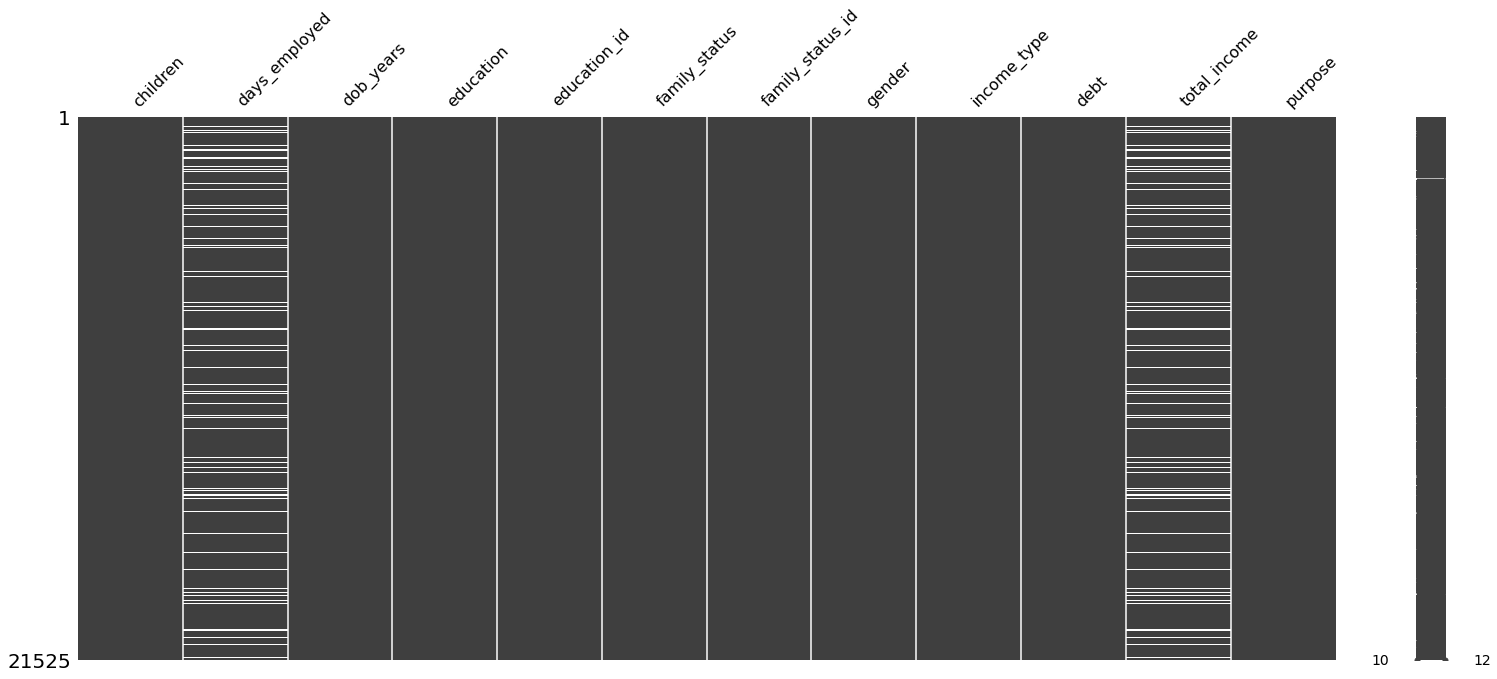

In [979]:
# Graficar correlacion de nulos
msno.matrix(df)

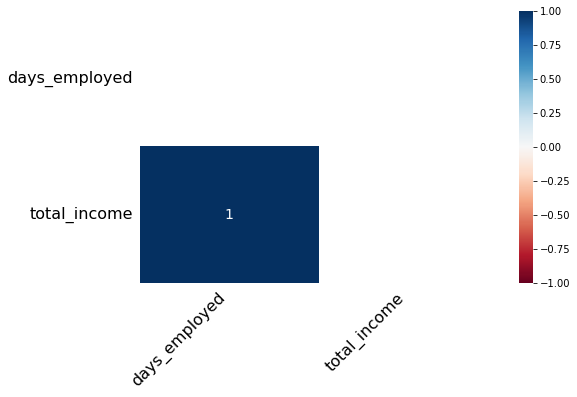

In [980]:
msno.heatmap(df,figsize=(8,5))

Los datos nulos para cada columna representan el 10 % de los datos. Estos valores ausentes son simétricos, ya que se observan 2174 filas con datos nulos para ambas casos  y se observa correlación entre ellos ya que faltan los días empleado y el monto de ingreso para cada una de las 2174 fila.

In [981]:
# Vamos a investigar a los clientes que no tienen datos sobre la característica identificada y la columna con los valores ausentes
df_drop = df.dropna()
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19351 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          19351 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         19351 non-null  int64  
 3   education         19351 non-null  object 
 4   education_id      19351 non-null  int64  
 5   family_status     19351 non-null  object 
 6   family_status_id  19351 non-null  int64  
 7   gender            19351 non-null  object 
 8   income_type       19351 non-null  object 
 9   debt              19351 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           19351 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 1.9+ MB


In [982]:
# Ahora crearé 2 tablas una sin valores ausentes y otra filtrada con valores ausentes
variable = 'education_id'

serie_limpia = df_drop[variable]
serie_filtrada = df_filtered[variable]

print(serie_limpia.value_counts())
print(serie_filtrada.value_counts())

1    13693
0     4716
2      675
3      261
4        6
Name: education_id, dtype: int64
1    1540
0     544
2      69
3      21
Name: education_id, dtype: int64


In [983]:
# Comprobación de la distribución
n_serie_limpia = len(serie_limpia)
n_serie_filtrada = len(serie_filtrada)

print(round(serie_limpia.value_counts() / n_serie_limpia * 100,2))
print()
print(round(serie_filtrada.value_counts() / n_serie_filtrada * 100,2))


1    70.76
0    24.37
2     3.49
3     1.35
4     0.03
Name: education_id, dtype: float64

1    70.84
0    25.02
2     3.17
3     0.97
Name: education_id, dtype: float64


Al comprobar la distribución podemos apreciar que la diferencia entre una tabla sin valores ausentes y otra con valores ausentes, sus diferencias son mínimas también observamos que los valores faltantes exhiben un patrón 'sistemático'. Para cada fila con datos faltantes, faltan los valores de `days_employed` y `total_income`. Esto significa que los datos "no faltan al azar (MNAR)".Dado que el tamaño de la muestra es lo suficientemente grande, podemos descartar el 10 % de los datos que faltan sin una pérdida sustancial del análisis estadístico.

In [984]:
# Comprobando la distribución en el conjunto de datos entero
variable = 'education'
serie_limpia = df_drop[variable]
serie_filtrada = df_filtered[variable]

n_serie_limpia = len(serie_limpia)
n_serie_filtrada = len(serie_filtrada)

print(round(serie_limpia.value_counts() / n_serie_limpia * 100,1))
print('--------------------------------------------------------------')
print(round(serie_filtrada.value_counts() / n_serie_filtrada * 100,1))

secondary education    63.8
bachelor's degree      21.8
SECONDARY EDUCATION     3.6
Secondary Education     3.3
some college            3.2
BACHELOR'S DEGREE       1.3
Bachelor's Degree       1.3
primary education       1.2
Some College            0.2
SOME COLLEGE            0.1
PRIMARY EDUCATION       0.1
Primary Education       0.1
graduate degree         0.0
Graduate Degree         0.0
GRADUATE DEGREE         0.0
Name: education, dtype: float64
--------------------------------------------------------------
secondary education    64.8
bachelor's degree      22.8
SECONDARY EDUCATION     3.1
Secondary Education     3.0
some college            2.5
Bachelor's Degree       1.1
BACHELOR'S DEGREE       1.1
primary education       0.9
Some College            0.3
SOME COLLEGE            0.3
Primary Education       0.0
PRIMARY EDUCATION       0.0
Name: education, dtype: float64


La distribución del conjunto de datos original y la tabla filtrada es muy similar, Lo que nos lleva a pensar que si eliminamos todos los datos no será significativo para el análisis. De todas formas seguiré analisando la tabla.

In [985]:
# Comprueba otras razones y patrones que podrían llevar a valores ausentes
print(df_filtered['education'].value_counts())
print('----------------------------------')
print(df['education'].value_counts())
# Solo los graduados no registran valores ausentes

secondary education    1408
bachelor's degree       496
SECONDARY EDUCATION      67
Secondary Education      65
some college             55
Bachelor's Degree        25
BACHELOR'S DEGREE        23
primary education        19
Some College              7
SOME COLLEGE              7
Primary Education         1
PRIMARY EDUCATION         1
Name: education, dtype: int64
----------------------------------
secondary education    13750
bachelor's degree       4718
SECONDARY EDUCATION      772
Secondary Education      711
some college             668
BACHELOR'S DEGREE        274
Bachelor's Degree        268
primary education        250
Some College              47
SOME COLLEGE              29
PRIMARY EDUCATION         17
Primary Education         15
graduate degree            4
Graduate Degree            1
GRADUATE DEGREE            1
Name: education, dtype: int64


In [986]:
# Comprobación de otros patrones:
print(df_filtered['income_type'].value_counts())
print('----------------------------------')
print(df['income_type'].value_counts())

employee         1105
business          508
retiree           413
civil servant     147
entrepreneur        1
Name: income_type, dtype: int64
----------------------------------
employee                       11119
business                        5085
retiree                         3856
civil servant                   1459
unemployed                         2
entrepreneur                       2
student                            1
paternity / maternity leave        1
Name: income_type, dtype: int64


Más que patrones se encunetran datos llamativos ya que en la columna `educación`, Solo los graduados no registran valores ausentes y en la columna `income_type`, Las personas cesantes, Estudiantes y con fueros maternales, No presentan valores ausentes

## Procesamiento de datos
Revisión columna `education`

In [987]:
# Veamos todos los valores en la columna de educación para verificar si será necesario corregir la ortografía y qué habrá que corregir exactamente
df['education'].unique()

array(["bachelor's degree", 'secondary education', 'Secondary Education',
       'SECONDARY EDUCATION', "BACHELOR'S DEGREE", 'some college',
       'primary education', "Bachelor's Degree", 'SOME COLLEGE',
       'Some College', 'PRIMARY EDUCATION', 'Primary Education',
       'Graduate Degree', 'GRADUATE DEGREE', 'graduate degree'],
      dtype=object)

In [988]:
# Corregir valores
df['education'] = df['education'].str.lower()

In [989]:
# Comprobar todos los valores en la columna para asegurarnos de que los hayamos corregido
df['education'].unique()

array(["bachelor's degree", 'secondary education', 'some college',
       'primary education', 'graduate degree'], dtype=object)

Revisión columna `children`

In [990]:
# Veamos la distribución de los valores en la columna `children`
print(df['children'].unique())

[ 1  0  3  2 -1  4 20  5]


In [991]:
# Distribución de la coluna
print(df['children'].value_counts())

 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64


In [992]:
menos_un_hijo = 47
total_datos = 21525
result1 = menos_un_hijo / total_datos *100
print(f'El porcentaje estudiado equivale al {result1}%') 

El porcentaje estudiado equivale al 0.2183507549361208%


In [993]:
print(df['children'].value_counts())

 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64


In [994]:
veinte_hijos = 76
total_datos = 21525
result2 = veinte_hijos / total_datos *100
print(f'El porcentaje estudiado es {result2}%') 

El porcentaje estudiado es 0.3530778164924506%


In [995]:
# Sumatoria de ambos porcentajes
print(result1 + result2)

0.5714285714285714


Existen 2 valores irrisorios (-1 y 20), Lo mas probable es que sean un error de digitación. Ambos digitos tienen una particiapción dentro de la columna del 0.57%, Al ser un porcantaje muy bajo determino que los eliminaré

In [996]:
# Función de imputación
for x in df.index:
  if df.loc[x, "children"] == 20:
    df.drop(x, inplace = True)
    
for x in df.index:
  if df.loc[x, "children"] == -1:
    df.drop(x, inplace = True)


In [997]:
# Comprobar la columna `children` de nuevo para asegurarnos de que todo está arreglado
df['children'].unique()

array([1, 0, 3, 2, 4, 5])

Revisión columna `days_employed`

In [998]:
# Valores únicos de la columna days_employed
df['days_employed'].unique()

array([-8437.67302776, -4024.80375385, -5623.42261023, ...,
       -2113.3468877 , -3112.4817052 , -1984.50758853])

In [999]:
# Filtrar por valores menor a 0 en columna days_employed.
df[df['days_employed'] <= 0].count()

children            15809
days_employed       15809
dob_years           15809
education           15809
education_id        15809
family_status       15809
family_status_id    15809
gender              15809
income_type         15809
debt                15809
total_income        15809
purpose             15809
dtype: int64

In [1000]:
datos_negativos = 15906
total_datos = 19351
resultado = round(datos_negativos / total_datos * 100)
print(f'El porcentaje de participacion de numeros negativos dentro de la columna es {resultado}%')

El porcentaje de participacion de numeros negativos dentro de la columna es 82%


In [1001]:
# Pasar a valor absoluto
df['days_employed'] = df['days_employed'].abs()

In [1002]:
# Comprobación del resultado
df['days_employed'].unique()

array([8437.67302776, 4024.80375385, 5623.42261023, ..., 2113.3468877 ,
       3112.4817052 , 1984.50758853])

Revisión columna `dob_years`

In [1003]:
# Mostrar valore unicos para dob_years
df['dob_years'].unique()

array([42, 36, 33, 32, 53, 27, 43, 50, 35, 41, 40, 65, 54, 56, 26, 48, 24,
       21, 57, 67, 28, 63, 62, 47, 34, 68, 25, 31, 30, 20, 49, 37, 45, 61,
       64, 44, 52, 46, 23, 38, 39, 51,  0, 59, 29, 60, 55, 58, 71, 22, 73,
       66, 69, 19, 72, 70, 74, 75])

In [1004]:
dato_erroneo = 1
datos_correctos = 57
resultado = (dato_erroneo / datos_correctos)
print()
print('El dato errado corresponde al : {:.0%} de la columna'.format(resultado))


El dato errado corresponde al : 2% de la columna


In [1005]:
# Reemplazar todos los 0 de la columna por el valor None. de esta forma no interfiere en nuestros calculos porteriores
df.loc[df['dob_years'] == 0 ,'dob_years'] = None

In [1006]:
# Comprobar resultado
df['dob_years'].unique()

array([42., 36., 33., 32., 53., 27., 43., 50., 35., 41., 40., 65., 54.,
       56., 26., 48., 24., 21., 57., 67., 28., 63., 62., 47., 34., 68.,
       25., 31., 30., 20., 49., 37., 45., 61., 64., 44., 52., 46., 23.,
       38., 39., 51., nan, 59., 29., 60., 55., 58., 71., 22., 73., 66.,
       69., 19., 72., 70., 74., 75.])

Revisión columna `family_status`.


In [1007]:
# Veamos los valores de la columna
print(df['family_status'].unique())

['married' 'civil partnership' 'widow / widower' 'divorced' 'unmarried']


In [1008]:
# Renombrar valores para mejor análisis
df['family_status'] = df['family_status'].replace('widow / widower','widower')
df['family_status'] = df['family_status'].replace('civil partnership','civil_partnership')

In [1009]:
# Comprueba el resultado - asegúrate de que esté arreglado
print(df['family_status'].unique())

['married' 'civil_partnership' 'widower' 'divorced' 'unmarried']


Revisión columna `gender`.

In [1010]:
# Veamos los valores en la columna
print(df['gender'].unique())

['F' 'M' 'XNA']


In [1011]:
# Cantidad de valores XNA
df[df['gender'] == 'XNA'].count()

children            1
days_employed       1
dob_years           1
education           1
education_id        1
family_status       1
family_status_id    1
gender              1
income_type         1
debt                1
total_income        1
purpose             1
dtype: int64

In [1012]:
# Eliminar valor XNA
df = df.drop(df[df['gender']== 'XNA'].index)

In [1013]:
# Comprobar resultado
print(df['gender'].unique())

['F' 'M']


Revisión columna `income_type`.

In [1014]:
# Veamos los valores en la columna
print(df['income_type'].unique())

['employee' 'retiree' 'business' 'civil servant' 'unemployed'
 'entrepreneur' 'student' 'paternity / maternity leave']


In [1015]:
# Aborda los valores problemáticos, si existen
df['income_type'] = df['income_type'].replace('civil servant','civil_servant')
df['income_type'] = df['income_type'].replace('paternity / maternity leave','maternity_leave')

In [1016]:
# Comprueba el resultado - asegúrate de que esté arreglado
print(df['income_type'].unique())

['employee' 'retiree' 'business' 'civil_servant' 'unemployed'
 'entrepreneur' 'student' 'maternity_leave']


In [1017]:
# Encontrar valores duplicados
df.duplicated().sum()

71

In [1018]:
# Eliminar duplicados
df = df.drop_duplicates() 

In [1019]:
# Comprobación
df.duplicated().sum()

0

In [1020]:
# Tamaño actual del dataframe
df.shape

(21330, 12)

El nuevo conjunto de datos muestra una leve reducción de registros ya que se eliminaron datos de la columna `children`, Se elimnaron los duplicados y se corrigieron algunas imperfecciones en los texos.

### Trabajar con valores ausentes

In [1021]:
# Categorizar columnas
print(df[['education_id','education']])
print()
print(df[['family_status_id','family_status']])

       education_id            education
0                 0    bachelor's degree
1                 1  secondary education
2                 1  secondary education
3                 1  secondary education
4                 1  secondary education
...             ...                  ...
21520             1  secondary education
21521             1  secondary education
21522             1  secondary education
21523             1  secondary education
21524             1  secondary education

[21330 rows x 2 columns]

       family_status_id      family_status
0                     0            married
1                     0            married
2                     0            married
3                     0            married
4                     1  civil_partnership
...                 ...                ...
21520                 1  civil_partnership
21521                 0            married
21522                 1  civil_partnership
21523                 0            married
21524   

### Restaurar valores ausentes en `total_income`

In [1022]:
# Vamos a escribir una función que calcule la categoría de edad
def age_group(age):
    if age <= 35:
        return 'joven'
    if age <= 65:
        return 'adulto'
    return 'mayor' 

In [1023]:
# Probar función 
print(age_group(66)) 

mayor


In [1024]:
# Crear una nueva columna basada en la función
df['category'] = df['dob_years'].apply(age_group)

<ipython-input-1024-2d594365335c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['category'] = df['dob_years'].apply(age_group)


In [1025]:
# Comprobar cómo los valores en la nueva columna
df['category'].unique()

array(['adulto', 'joven', 'mayor'], dtype=object)

In [1026]:
# Crear tabla sin valores ausentes
df_drop

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding
...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,-4529.316663,43,secondary education,1,civil partnership,1,F,business,0,35966.698,housing transactions
21521,0,343937.404131,67,secondary education,1,married,0,F,retiree,0,24959.969,purchase of a car
21522,1,-2113.346888,38,secondary education,1,civil partnership,1,M,employee,1,14347.610,property
21523,3,-3112.481705,38,secondary education,1,married,0,M,employee,1,39054.888,buying my own car


In [1027]:
# Examinar los valores medios de los ingresos
df_drop['total_income'].mean()

26787.568354658673

In [1028]:
# Examinar los valores medianos de los ingresos
df_drop['total_income'].median()

23202.87

In [1029]:
print(df_drop['total_income'].min())
print('----------------------------')
print(df_drop['total_income'].max())

3306.762
----------------------------
362496.645


In [1030]:
income_med = df['total_income'].median()
income_med

23202.87

Tras analizar el ingreso maximo y el minimo en la tabla. Se puede apreciar una diferencia de hasta 100 veces entre el suledo minimo y maximo lo que me lleva utilzar la mediana como dato mas certero 

In [1031]:
# función que usaremos para completar los valores ausentes
def reemplazar_median(serie):
    return serie.fillna(serie.median())

columna = 'total_income'
df[columna] = reemplazar_median(df[columna])

In [1032]:
# Comprobación
df['total_income'].isna().sum()

0

In [1033]:
# Información general
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21330 entries, 0 to 21524
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21330 non-null  int64  
 1   days_employed     19239 non-null  float64
 2   dob_years         21230 non-null  float64
 3   education         21330 non-null  object 
 4   education_id      21330 non-null  int64  
 5   family_status     21330 non-null  object 
 6   family_status_id  21330 non-null  int64  
 7   gender            21330 non-null  object 
 8   income_type       21330 non-null  object 
 9   debt              21330 non-null  int64  
 10  total_income      21330 non-null  float64
 11  purpose           21330 non-null  object 
 12  category          21330 non-null  object 
dtypes: float64(3), int64(4), object(6)
memory usage: 2.3+ MB


In [1034]:
# distribución de las columnas
df.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21330.000000,19239.000000,21230.000000,21330.000000,21330.000000,21330.000000,21330.000000
mean,0.474027,67031.052813,43.482713,0.816925,0.974496,0.081200,26439.706083
std,0.752389,139133.681187,12.247789,0.549235,1.421820,0.273149,15703.983604
min,0.000000,24.141633,19.000000,0.000000,0.000000,0.000000,3306.762000
25%,0.000000,927.974414,33.000000,1.000000,0.000000,0.000000,17200.597250
50%,0.000000,2194.814342,43.000000,1.000000,0.000000,0.000000,23202.870000
75%,1.000000,5557.111735,53.000000,1.000000,1.000000,0.000000,31331.348000
max,5.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,362496.645000


In [1035]:
# Comprobar el número de entradas en las columnas
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21330 entries, 0 to 21524
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21330 non-null  int64  
 1   days_employed     19239 non-null  float64
 2   dob_years         21230 non-null  float64
 3   education         21330 non-null  object 
 4   education_id      21330 non-null  int64  
 5   family_status     21330 non-null  object 
 6   family_status_id  21330 non-null  int64  
 7   gender            21330 non-null  object 
 8   income_type       21330 non-null  object 
 9   debt              21330 non-null  int64  
 10  total_income      21330 non-null  float64
 11  purpose           21330 non-null  object 
 12  category          21330 non-null  object 
dtypes: float64(3), int64(4), object(6)
memory usage: 2.3+ MB


###  Restaurar valores en `days_employed`

In [1036]:
# Distribución de las medianas de `days_employed` en función de los parámetros identificados 
round(df['days_employed'].median())

2195

In [1037]:
# Distribución de las medias de 'days_employed' en función de los parámetrs identificados 
round(df['days_employed'].mean())

67031

In [1038]:
# La ejecución muestra un max de 4021755 que es igual a 632 años.
df['days_employed'].describe()

count     19239.000000
mean      67031.052813
std      139133.681187
min          24.141633
25%         927.974414
50%        2194.814342
75%        5557.111735
max      401755.400475
Name: days_employed, dtype: float64

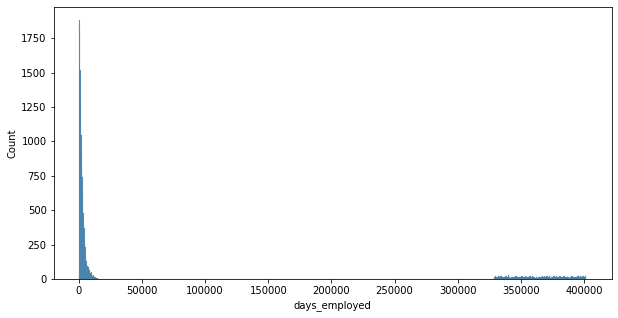

In [1039]:
# Visualizar distribución 
plt.figure(figsize=(10, 5))
sns.histplot(
   df['days_employed']
);

In [1040]:
# Creo una tabla que muestre desde el último dato correcto hasta el erróneo
df[df['days_employed'] > 18389].sort_values(by = 'days_employed')

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,category
20444,0,328728.720605,72.0,secondary education,1,widower,2,F,retiree,0,15443.094,purchase of the house for my family,mayor
9328,2,328734.923996,41.0,bachelor's degree,0,married,0,M,retiree,0,20319.600,transactions with my real estate,adulto
17782,0,328771.341387,56.0,secondary education,1,married,0,F,retiree,0,10983.688,transactions with commercial real estate,adulto
14783,0,328795.726728,62.0,bachelor's degree,0,married,0,F,retiree,0,12790.431,buying my own car,adulto
7229,1,328827.345667,32.0,secondary education,1,civil_partnership,1,F,retiree,0,19546.075,to have a wedding,joven
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7794,0,401663.850046,61.0,secondary education,1,civil_partnership,1,F,retiree,0,7725.831,wedding ceremony,adulto
2156,0,401674.466633,60.0,secondary education,1,married,0,M,retiree,0,52063.316,cars,adulto
7664,1,401675.093434,61.0,secondary education,1,married,0,F,retiree,0,20194.323,housing transactions,adulto
10006,0,401715.811749,69.0,bachelor's degree,0,unmarried,4,F,retiree,0,9182.441,getting an education,mayor


In [1041]:
# Elimino todos los datos sin sentido de la columna
df = df.drop(df[df['days_employed'] > 18389].index) 

In [1042]:
df['days_employed'].describe()

count    15808.000000
mean      2353.653679
std       2304.632695
min         24.141633
25%        756.781936
50%       1630.394535
75%       3157.797080
max      18388.949901
Name: days_employed, dtype: float64

In [1043]:
# Crear función que calcule medias o medianas (dependiendo de tu decisión) según el parámetro identificado
def reemplazar_media(serie):
    return serie.fillna(serie.mean())

columna = 'days_employed'
df[columna] = reemplazar_median(df[columna])

In [1044]:
# Comprueba que la función funciona
df['days_employed'].isna().sum()

0

In [1045]:
# Comprobar función
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17899 entries, 0 to 21524
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          17899 non-null  int64  
 1   days_employed     17899 non-null  float64
 2   dob_years         17816 non-null  float64
 3   education         17899 non-null  object 
 4   education_id      17899 non-null  int64  
 5   family_status     17899 non-null  object 
 6   family_status_id  17899 non-null  int64  
 7   gender            17899 non-null  object 
 8   income_type       17899 non-null  object 
 9   debt              17899 non-null  int64  
 10  total_income      17899 non-null  float64
 11  purpose           17899 non-null  object 
 12  category          17899 non-null  object 
dtypes: float64(3), int64(4), object(6)
memory usage: 1.9+ MB


In [1046]:
# Comprobar valores corregidos
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17899 entries, 0 to 21524
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          17899 non-null  int64  
 1   days_employed     17899 non-null  float64
 2   dob_years         17816 non-null  float64
 3   education         17899 non-null  object 
 4   education_id      17899 non-null  int64  
 5   family_status     17899 non-null  object 
 6   family_status_id  17899 non-null  int64  
 7   gender            17899 non-null  object 
 8   income_type       17899 non-null  object 
 9   debt              17899 non-null  int64  
 10  total_income      17899 non-null  float64
 11  purpose           17899 non-null  object 
 12  category          17899 non-null  object 
dtypes: float64(3), int64(4), object(6)
memory usage: 1.9+ MB


In [1047]:
# Muestra los valores de los datos seleccionados para la clasificación
grupo1 = df[['purpose','family_status']]
grupo1

,purpose,family_status
0,purchase of the house,married
1,car purchase,married
2,purchase of the house,married
3,supplementary education,married
5,purchase of the house,civil_partnership
...,...,...
21519,buy commercial real estate,divorced
21520,housing transactions,civil_partnership
21522,property,civil_partnership
21523,buying my own car,married


In [1048]:
# Comprobar los valores únicos
print(grupo1['purpose'].value_counts())
print()
print(grupo1['family_status'].value_counts())

wedding ceremony                            669
having a wedding                            637
to have a wedding                           633
real estate transactions                    560
housing transactions                        553
buy commercial real estate                  553
buying property for renting out             547
property                                    539
housing                                     539
transactions with commercial real estate    539
purchase of my own house                    538
purchase of the house for my family         530
purchase of the house                       528
construction of own property                528
transactions with my real estate            526
building a property                         523
buy residential real estate                 517
buy real estate                             515
housing renovation                          513
building a real estate                      509
buying my own car                       

In [1049]:
print(len(grupo1['purpose'].unique())) 
print(len(grupo1['family_status'].unique())) 

38
5


Se observa que existen 38 valores unicos pero que se pueden agrupar en 5 categorias ya que tienen relación al mismo tema.

In [1050]:
# Escribamos una función para clasificar los datos en función de temas comunes
def tem_com(comun):
    if comun == 'purchase of the house' or comun == "purchase of the house for my family" or comun == "construction of own property" or comun == "property" or comun == "building a property" or comun == "purchase of my own house" or comun == "housing renovation" or comun == "housing":
        return "propiedad"
    if comun == "car purchase" or comun == "buying a second-hand car" or comun == "buying my own car" or comun == "cars" or comun == "second-hand car purchase" or comun == "car" or comun == "to own a car" or comun == "purchase of a car" or comun == "to buy a car":
        return "vehiculo"
    if comun == "supplementary education" or comun == "education" or comun == "to become educated" or comun == "getting an education" or comun == "to get a supplementary education" or comun == "getting higher education" or comun == "profile education" or comun == "university education" or comun == "going to university":
        return "educacion"
    if comun == "to have a wedding" or comun == "having a wedding" or comun == "wedding ceremony":
        return "matrimonio"
    if comun == "housing transactions" or comun == "buy real estate" or comun == "buy commercial real estate" or comun == "buy residential real estate" or comun == "transactions with commercial real estate" or comun == "building a real estate" or comun == "transactions with my real estate" or comun == "real estate transactions" or comun == "buying property for renting out":
        return "negocio"

In [1051]:
# Crea una columna con las categorías y cuenta los valores en ellas
df['category_comun'] = df['purpose'].apply(tem_com)
df['category_comun'].value_counts()

negocio       4819
propiedad     4238
vehiculo      3567
educacion     3336
matrimonio    1939
Name: category_comun, dtype: int64

In [1052]:
# Revisar todos los datos numéricos en la columna seleccionada para la clasificación
grupo2 = df[['children','debt','total_income']]
grupo2

,children,debt,total_income
0,1,0,40620.102
1,1,0,17932.802
2,0,0,23341.752
3,3,0,42820.568
5,0,0,40922.170
...,...,...,...
21519,1,0,18551.846
21520,1,0,35966.698
21522,1,1,14347.610
21523,3,1,39054.888


In [1053]:
# Obtener estadísticas resumidas para la columna
grupo2.describe()

,children,debt,total_income
count,17899.000000,17899.000000,17899.000000
mean,0.547628,0.086597,27300.091319
std,0.787805,0.281251,16050.576532
min,0.000000,0.000000,3418.824000
25%,0.000000,0.000000,18125.182000
50%,0.000000,0.000000,23202.870000
75%,1.000000,0.000000,32015.691000
max,5.000000,1.000000,362496.645000


In [1054]:
def salary_rang(salary):
    if salary <= 20000:
        return 'Salario bajo'
    if salary <= 100000:
        return 'Salario medio'
    if salary <= 363000:
        return 'Salario alto'
    
print(salary_rang(5000))

Salario bajo


In [1055]:
df['salary_level'] = df['total_income'].apply(salary_rang)
df.columns

Index(['children', 'days_employed', 'dob_years', 'education', 'education_id',
       'family_status', 'family_status_id', 'gender', 'income_type', 'debt',
       'total_income', 'purpose', 'category', 'category_comun',
       'salary_level'],
      dtype='object')

Tras analizar los valores máximos y mínimos de la columna `total_income`,Muestra que existe una diferencia muy grande entre el sueldo mas bajo y el mas alto, Es por eso que realizo el corte de salario como se muestra a continuación. 

In [1056]:
# Crear una función para clasificar en diferentes grupos numéricos basándose en rangos
def salary_rang(salary):
    if salary <= 20000:
        return 'Salario bajo'
    if salary <= 100000:
        return 'Salario medio'
    if salary <= 363000:
        return 'Salario alto'
    
print(salary_rang(5000))

Salario bajo


In [1057]:
# Crear una columna con categorías
df['salary_level'] = df['total_income'].apply(salary_rang)
df.columns

Index(['children', 'days_employed', 'dob_years', 'education', 'education_id',
       'family_status', 'family_status_id', 'gender', 'income_type', 'debt',
       'total_income', 'purpose', 'category', 'category_comun',
       'salary_level'],
      dtype='object')

In [1058]:
# Contar los valores de cada categoría para ver la distribución
print(df['category'].value_counts())
print("-----")
print(df['category_comun'].value_counts())
print("-----")
print(df['salary_level'].value_counts())

adulto    11152
joven      6527
mayor       220
Name: category, dtype: int64
-----
negocio       4819
propiedad     4238
vehiculo      3567
educacion     3336
matrimonio    1939
Name: category_comun, dtype: int64
-----
Salario medio    12319
Salario bajo      5487
Salario alto        93
Name: salary_level, dtype: int64


## Comprobación de las hipótesis


**¿Existe una correlación entre tener hijos y pagar a tiempo?**

In [1059]:
# Comprueba los datos sobre los hijos y los pagos puntuales
print(df.groupby('children')['debt'].value_counts())
print()
# Calcular la tasa de incumplimiento en función del número de hijos
def porcent(nopay, pay):
    pago = nopay / pay *100
    return pago

print(porcent(0,9))
print()
print('La tasa de incumplimiento para quienes tienen 0 hijos es de 8.1 %')
print('La tasa de incumplimiento para quienes tienen 1 hijos es de 10.1 %')
print('La tasa de incumplimiento para quienes tienen 2 hijos es de 10.4 %')
print('La tasa de incumplimiento para quienes tienen 3 hijos es de 8.9 %')
print('La tasa de incumplimiento para quienes tienen 4 hijos es de 10.8 %')
print('La tasa de incumplimiento para quienes tienen 5 hijos es de 0 %')

children  debt
0         0       10040
          1         896
1         0        4123
          1         432
2         0        1843
          1         192
3         0         298
          1          26
4         0          36
          1           4
5         0           9
Name: debt, dtype: int64

0.0

La tasa de incumplimiento para quienes tienen 0 hijos es de 8.1 %
La tasa de incumplimiento para quienes tienen 1 hijos es de 10.1 %
La tasa de incumplimiento para quienes tienen 2 hijos es de 10.4 %
La tasa de incumplimiento para quienes tienen 3 hijos es de 8.9 %
La tasa de incumplimiento para quienes tienen 4 hijos es de 10.8 %
La tasa de incumplimiento para quienes tienen 5 hijos es de 0 %


In [1060]:
pd.pivot_table(df, index = ['children'])

,days_employed,debt,dob_years,education_id,family_status_id,total_income
children,,,,,,
0,2377.213413,0.081931,42.642043,0.805688,1.162674,27347.437258
1,2108.278917,0.094841,37.476757,0.781778,0.798463,27199.647572
2,2080.329612,0.094349,35.877844,0.789189,0.447174,27059.909757
3,2115.389088,0.080247,36.322981,0.824074,0.401235,28717.110741
4,2083.749242,0.100000,35.800000,0.775000,0.525000,26643.802050
5,1454.353705,0.000000,38.777778,1.222222,0.222222,26817.072000


Según lo analizado no existe una gran diferencia en la tasa de incumplimiento por ende el tener hijos no es sinonimo de no pagar a tiempo. Si bien las personas con 5 hijos no presentan morosidad esto se debe al tamaño de la muestra.

**¿Existe una correlación entre la situación familiar y el pago a tiempo?**

In [1061]:
# Comprueba los datos del estado familiar y los pagos a tiempo
print(df.groupby('family_status')['debt'].value_counts())
print()
# Calcular la tasa de incumplimiento basada en el estado familiar
def porcent(nopay, pay):
    pago = nopay / pay *100
    return pago

print(porcent(63,889))
print()
print('La tasa de incumplimiento para quienes estan unidos civilmente es de 10.1 %')
print('La tasa de incumplimiento para quienes estan divorciados es de 7.6 %')
print('La tasa de incumplimiento para quienes estan casados es de 8.1 %')
print('La tasa de incumplimiento para quienes estan solteros es de 10.8 %')
print('La tasa de incumplimiento para quienes estan viudos es de 7.0 %')

family_status      debt
civil_partnership  0       3201
                   1        356
divorced           0        919
                   1         73
married            0       9565
                   1        829
unmarried          0       2224
                   1        261
widower            0        440
                   1         31
Name: debt, dtype: int64

7.086614173228346

La tasa de incumplimiento para quienes estan unidos civilmente es de 10.1 %
La tasa de incumplimiento para quienes estan divorciados es de 7.6 %
La tasa de incumplimiento para quienes estan casados es de 8.1 %
La tasa de incumplimiento para quienes estan solteros es de 10.8 %
La tasa de incumplimiento para quienes estan viudos es de 7.0 %


In [1062]:
pd.pivot_table(df, index = ['family_status'])

,children,days_employed,debt,dob_years,education_id,family_status_id,total_income
family_status,,,,,,,
civil_partnership,0.517009,2176.633107,0.100084,39.597285,0.823166,1,27000.129058
divorced,0.493952,2350.555985,0.073589,43.332655,0.785282,3,27784.970646
married,0.650375,2376.324758,0.079758,40.955283,0.787474,0,27513.399898
unmarried,0.242656,1826.502197,0.105030,36.002831,0.798390,4,27116.436647
widower,0.233546,2767.089887,0.065817,52.227660,0.872611,2,24805.861926


Según lo analizado los solteros y los unidos civilmente son los grupos que mas caen en incuplimiento de pago, Quizas recae en la juventud del grupo y la falta de resposabilidad del grupo.

**¿Existe una correlación entre el nivel de ingresos y el pago a tiempo?**

In [1063]:
# Comprueba los datos del nivel de ingresos y los pagos a tiempo
print(df.groupby('salary_level')['debt'].value_counts())
print()

# Calcular la tasa de incumplimiento basada en el nivel de ingresos
def porcent(nopay, pay):
    pago = nopay / pay *100
    return pago

print(porcent(6,93))
print()
print('La tasa de incumplimiento para quienes tienen un salario alto es de 6.4 %')
print('La tasa de incumplimiento para quienes tienen un salario medio es de 9.0 %')
print('La tasa de incumplimiento para quienes tienen un salario bajo es de 8.7 %')


salary_level   debt
Salario alto   0          87
               1           6
Salario bajo   0        4970
               1         517
Salario medio  0       11292
               1        1027
Name: debt, dtype: int64

6.451612903225806

La tasa de incumplimiento para quienes tienen un salario alto es de 6.4 %
La tasa de incumplimiento para quienes tienen un salario medio es de 9.0 %
La tasa de incumplimiento para quienes tienen un salario bajo es de 8.7 %


In [1064]:
pd.pivot_table(df, index = ['salary_level'])

,children,days_employed,debt,dob_years,education_id,family_status_id,total_income
salary_level,,,,,,,
Salario alto,0.709677,2639.721969,0.064516,41.096774,0.311828,0.967742,143632.854978
Salario bajo,0.572079,2312.637625,0.094223,39.646455,0.893020,0.977037,14807.140816
Salario medio,0.535514,2246.998583,0.083367,40.769162,0.759640,0.971183,31986.337961


Según lo análizado el nivel de ingreso si influye en la capacidad de pago. Siendo el grupo de mayores ingresos el que  muestra una menor tasa de incumplimiento. Por otra parte el grupo de menores ingresos y el de ingresos medios muestran tasas similares de incumplimiento.

**¿Cómo afecta el propósito del crédito a la tasa de incumplimiento?**

In [1065]:
# Consulta los porcentajes de tasa de incumplimiento para cada propósito del crédito y analízalos
print(df.groupby('category_comun')['debt'].value_counts())
print()

def porcent(nopay, pay):
    pago = nopay / pay *100
    return pago

print(porcent(400,3888))
print()
print('La tasa de incumplimiento para el proposito educación es de 10.1 %')
print('La tasa de incumplimiento para el proposito matrimonio es de 8.4 %')
print('La tasa de incumplimiento para el proposito negocio es de 8.1 %')
print('La tasa de incumplimiento para el proposito propiedad es de 7.3 %')
print('La tasa de incumplimiento para el proposito vehiculo es de 10.2 %')


category_comun  debt
educacion       0       3009
                1        327
matrimonio      0       1775
                1        164
negocio         0       4423
                1        396
propiedad       0       3932
                1        306
vehiculo        0       3210
                1        357
Name: debt, dtype: int64

10.2880658436214

La tasa de incumplimiento para el proposito educación es de 10.1 %
La tasa de incumplimiento para el proposito matrimonio es de 8.4 %
La tasa de incumplimiento para el proposito negocio es de 8.1 %
La tasa de incumplimiento para el proposito propiedad es de 7.3 %
La tasa de incumplimiento para el proposito vehiculo es de 10.2 %


In [1066]:
pd.pivot_table(df, index = ['category_comun'])

,children,days_employed,debt,dob_years,education_id,family_status_id,total_income
category_comun,,,,,,,
educacion,0.556355,2255.098706,0.098022,40.521961,0.809652,0.948741,26748.314198
matrimonio,0.535327,2304.524587,0.084580,40.343896,0.783394,1.000000,26918.876681
negocio,0.546171,2291.175724,0.082175,40.488949,0.803071,0.980079,27632.453129
propiedad,0.551911,2254.365641,0.072204,40.255803,0.789051,0.964842,27467.683385
vehiculo,0.543033,2250.925840,0.100084,40.502395,0.799832,0.980936,27375.223618


Según lo analizado, El grupo que presenta la tasa de incumplimiento mas alta es vehiculo,Quizas se debe a que está dentro de los objetivos generales de las personas pero es uno de los objetivos mas caros depues de la casa propia y eso podria llevar a complicaciones en el pago. 

# Conclusión general
Al final de este proyecto, llevamos a cabo un preprocesamiento de datos para nuestro cliente que está tratando de analizar el riesgo de incumplimiento en el pago del préstamo. En este proyecto, limpiamos los datos, hicimos alguna conversión de tipos, categorizamos los datos, procesamos los duplicados en los datos y preparamos los datos para el análisis. Usando una tabla dinámica y un poco de análisis exploratorio de datos, pudimos llegar a las siguientes conclusiones sobre el cliente del banco:
 
1. Las personas que tiene de 1 a 4 hijos tienen una alta probabilidad de no pagar el préstamo.
2. Las personas con 5 hijos no muestran morosidad pero debe ser por que la muestra de datos es muy pequeña en relación a todo el grupo estudiado.
3. Las personas solteras tienen la mayor probabilidad de caer en incumplimiento y los viduos la menor probabilidad de caer en incumplimiento de pago.
4. Las personas con mayores ingresos tienen menos probabilidades de incumplimiento del pago. Sin embargo los sueldos medios y bajos tienen la mayor probabilidad de no pagar el préstamo.
5. Las personas que solicitan un préstamo para la compra de un automóvil y con fines educativos probablemente incumplirán en el pago del préstamo. Las personas que solicitan un préstamo para la compra de una casa muestran la mejor tasa de cumplimiento.